In [107]:
import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy import stats

In [108]:
plt.style.use("fivethirtyeight")

In [109]:
SIZE = 10000
# N_BINS = int(1 + np.log2(SIZE))
N_BINS = 50

SEED = 42

Seja a v.a. $X$ definida como a soma de **n** v.a. ($X$ = $X_1$ + $X_2$ + ... +$X_n$) uniformemente distribuídas entre 0 e 1. Desenvolva um programa para obter a média ($E[X]$), a variância ($\sigma^2[X]$), o segundo momento ($E[X^2]$).

In [110]:
rand_vars = np.array([ stats.uniform.rvs(size=SIZE) for i in range(12) ])
x         = np.sum(rand_vars, axis=0)

In [111]:
rand_vars

array([[0.91823387, 0.59134605, 0.06155591, ..., 0.04525418, 0.29001774,
        0.90308925],
       [0.6088332 , 0.5300934 , 0.48407016, ..., 0.59540336, 0.44434152,
        0.90553129],
       [0.4259735 , 0.61758508, 0.84911092, ..., 0.66235271, 0.08009311,
        0.2967393 ],
       ...,
       [0.67369055, 0.88482922, 0.83584088, ..., 0.81625091, 0.29661116,
        0.08780148],
       [0.71154031, 0.39628615, 0.32004693, ..., 0.66703749, 0.54460534,
        0.74691605],
       [0.92397468, 0.76046974, 0.06655752, ..., 0.5522378 , 0.9924533 ,
        0.81228948]])

In [112]:
def compute_stats(x: np.array) -> dict:
  return {
    "E[X]":  np.mean(x),
    "σ²[X]": np.var(x),
    "E[X²]": stats.moment(x, moment=2)
  }

In [113]:
print(compute_stats(x))

{'E[X]': 6.004538169415758, 'σ²[X]': 1.000752204401691, 'E[X²]': 1.000752204401691}


Gere os gráficos das funções densidade de probabilidade (fX(X)) e distribuição de probabilidade (FX(X)), para o caso de n = 1, 2, ..., 12.
Analise os resultados. Para qual distribuição a v.a. X tende quando o valor de **n** aumenta?

In [114]:
x_stats = pd.DataFrame({
  "E[X]":  [],
  "σ²[X]": [],
  "E[X²]": [],
  "Norm":  []
})

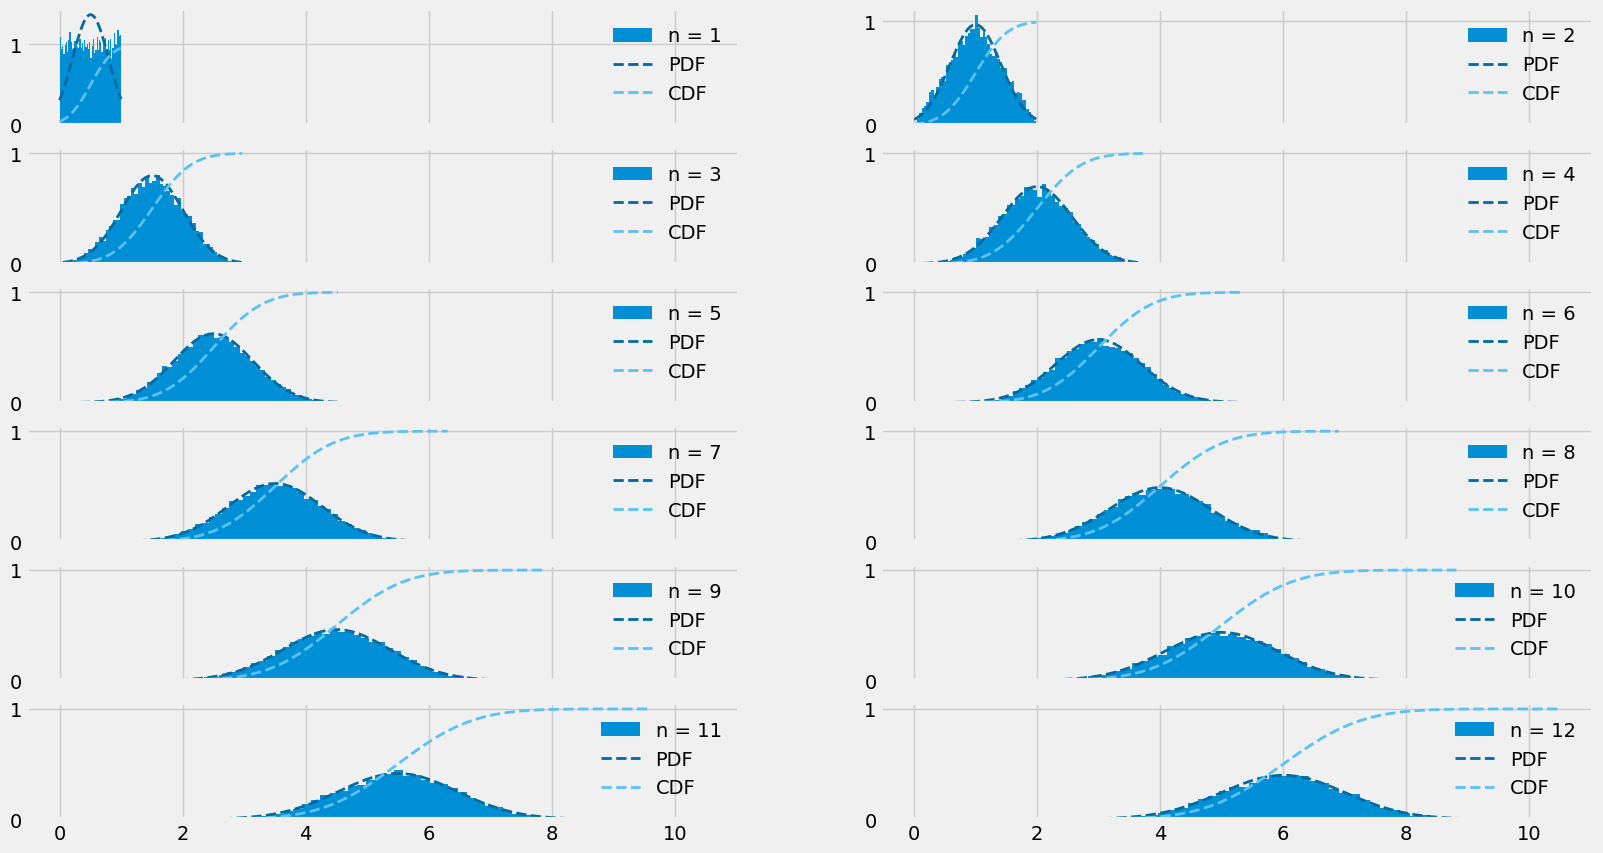

In [115]:
fig, ax = plt.subplots(6, 2, figsize=(18, 10), sharex=True)

x_n = np.zeros(SIZE)

for i, axis in enumerate(ax.flat):
  x_n += rand_vars[i, :]

  x_n_stats     = compute_stats(x_n)
  stat, p_value = stats.normaltest(x_n)

  x_stats = pd.concat([x_stats, pd.DataFrame({
    "E[X]":  x_n_stats["E[X]"],
    "σ²[X]": x_n_stats["σ²[X]"],
    "E[X²]": x_n_stats["E[X²]"],
    "Norm": "Yes" if not (p_value < 0.05) else "No"
  }, index=[0])], ignore_index=True)

  n, bins, patches = axis.hist(x_n, bins=N_BINS, density=True, label=f"n = {i + 1}")

  pdf = stats.norm.pdf(bins, loc=x_n_stats["E[X]"], scale=np.sqrt(x_n_stats["σ²[X]"]))
  cdf = stats.norm.cdf(bins, loc=x_n_stats["E[X]"], scale=np.sqrt(x_n_stats["σ²[X]"]))

  axis.plot(bins, pdf, "--", color="#006A9F", label="PDF", linewidth=2)
  axis.plot(bins, cdf, "--", color="#59C2F6", label="CDF", linewidth=2)

  axis.legend().get_frame().set_visible(False)

x_stats.index = [ f"n = {i + 1}" for i in range(12) ]

plt.show()

In [116]:
x_stats

,E[X],σ²[X],E[X²],Norm
n = 1,0.503479,0.084797,0.084797,No
n = 2,1.003455,0.169892,0.169892,No
n = 3,1.505290,0.249364,0.249364,No
n = 4,2.002071,0.325386,0.325386,No
n = 5,2.499724,0.407688,0.407688,No
n = 6,3.000756,0.486404,0.486404,No
n = 7,3.501475,0.574827,0.574827,No
n = 8,4.001549,0.666046,0.666046,No
n = 9,4.502513,0.750857,0.750857,No
n = 10,5.000571,0.838086,0.838086,No


Por que isto ocorre? Há uma expressão para a média e a variância em função de n?

Sugestões: use tamanho de 10.000 amostras para gerar cada sequência de v.a..

Investigue o teorema do limite central.

Média em função de **n**:

$\mu = \frac{\sum^{n}_{i=1}x_i}{n}$

Variância em função de **n**:

$\sigma^2 = \frac{\sum^{n}_{i=1}(x_i - \mu)^2}{n}$


Se $X$ = $X_1$ + $X_2$ + ... +$X_n$ , logo:

$E[X]$ = $E[X_1]$ + $E[X_2]$ + ... +$E[X_n]$

In [118]:
x_n = np.zeros(SIZE)

for i, axis in enumerate(rand_vars):
  x_n += rand_vars[i, :]

  x_n_stats     = compute_stats(x_n)
  stat, p_value = stats.normaltest(x_n)

  print("=" * 18)
  print(f"\033[1;34mE[Xn]\033[0m  = {np.mean(x_n):.4f}")
  print(f"\033[1;34m∑E[Xi]\033[0m = {np.sum(np.array([np.mean(rand_var) for rand_var in rand_vars[:(i + 1), :]])):.4f}")

print("=" * 18)

E[Xn]  = 0.5035
∑E[Xi] = 0.5035
E[Xn]  = 1.0035
∑E[Xi] = 1.0035
E[Xn]  = 1.5053
∑E[Xi] = 1.5053
E[Xn]  = 2.0021
∑E[Xi] = 2.0021
E[Xn]  = 2.4997
∑E[Xi] = 2.4997
E[Xn]  = 3.0008
∑E[Xi] = 3.0008
E[Xn]  = 3.5015
∑E[Xi] = 3.5015
E[Xn]  = 4.0015
∑E[Xi] = 4.0015
E[Xn]  = 4.5025
∑E[Xi] = 4.5025
E[Xn]  = 5.0006
∑E[Xi] = 5.0006
E[Xn]  = 5.4965
∑E[Xi] = 5.4965
E[Xn]  = 6.0045
∑E[Xi] = 6.0045
